In [41]:
!pip install cartopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 58.6 MB/s eta 0:00:00


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
eruptions = pd.read_csv('https://raw.githubusercontent.com/JoeRuggieroStudent/ML_Projects/main/eruptions.csv')


# Introduction to my dataset
This dataset ("eruptions") is a non-comprehensive list of over 11,000 volcanic eruptions through the historical record going back to ~1850.  The dataset contains the name of each volcano, the start year and month, the category of eruption, the VEI (volcanic explosivity index) the evidence for the volcano, and the location of each.  I would not consider this dataset "big data", but it is large, and I am hoping we can run some interesting regression on these.  I really picked this one for the regression module because acts almost as a time series, in which we can compare the amount of eruptions over time in context of a bunch of different variables (with some caveats we will explore further down).  I hope to use several kinds of regression to explore this large dataset.  Some interesting questions I can answer:
1. Is there a time of year that volcanoes happen?
2. Is there a specific year in this dataset that had more volcanoes? If so, why?
3. Is there a specific location on Earth where the most explosive volcanoes occur?
4. How long do volcanoes usually last?
5.  Is there any kind of cyclicity to eruptions that can be observed in this record?
6.  There is also an interesting column called 'evidence_method_dating', which refers to how we know a volcanic eruption occurred.  Most of the dataset is recorded by historical observations (basically someone seeing it happening), but there are a bunch of samples that are recorded by radiocarbon, tephra layers, and sediment varves.  It will be interesting to examine those samples specifically and see if they are concentrated in any particular areas or times.

We'll hold off answering those exciting questions for now, and here focus on some exploratory data analysis.


In [6]:
eruptions.head()

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550


#Eruptions.shape

In [15]:
eruptions.shape

(11178, 15)

This dataset has 11,178 rows and 15 columns describing volcanic eruptions

#Eruptions.describe

In [13]:
eruptions.describe()

,volcano_number,eruption_number,vei,start_year,start_month,start_day,end_year,end_month,end_day,latitude,longitude
count,11178.000000,11178.000000,8272.000000,11177.000000,10985.000000,10982.000000,4332.000000,4329.000000,4326.000000,11178.000000,11178.000000
mean,300284.371176,15666.905439,1.947897,622.848260,3.450888,7.015025,1917.326639,6.220836,13.315996,16.865778,31.572377
std,52321.193203,3297.612433,1.161098,2482.174317,4.071419,9.645386,157.646408,3.686128,9.831282,30.761752,115.248384
min,210010.000000,10001.000000,0.000000,-11345.000000,0.000000,0.000000,-475.000000,0.000000,0.000000,-77.530000,-179.970000
25%,263310.000000,12817.250000,1.000000,680.000000,0.000000,0.000000,1895.000000,3.000000,4.000000,-6.102000,-77.656000
50%,290050.000000,15650.500000,2.000000,1847.000000,1.000000,0.000000,1957.000000,6.000000,15.000000,17.600000,55.708000
75%,343030.000000,18463.750000,2.000000,1950.000000,7.000000,15.000000,1992.000000,9.000000,21.000000,40.821000,139.394000
max,600000.000000,22355.000000,7.000000,2020.000000,12.000000,31.000000,2020.000000,12.000000,31.000000,85.608000,179.580000


eruptions.describe() is not the most descriptive for this dataset, as each sample here represents a different point count in a different location at a different time.  Therefore, knowing the average isn't that useful for these data (except for VEI, which tells us that the average volcano through time has had a VEI of 1.95, which is not insignificant.

#Seaborn Pairplot
Let's first visualize and compare the numeric data columns in a pairplot

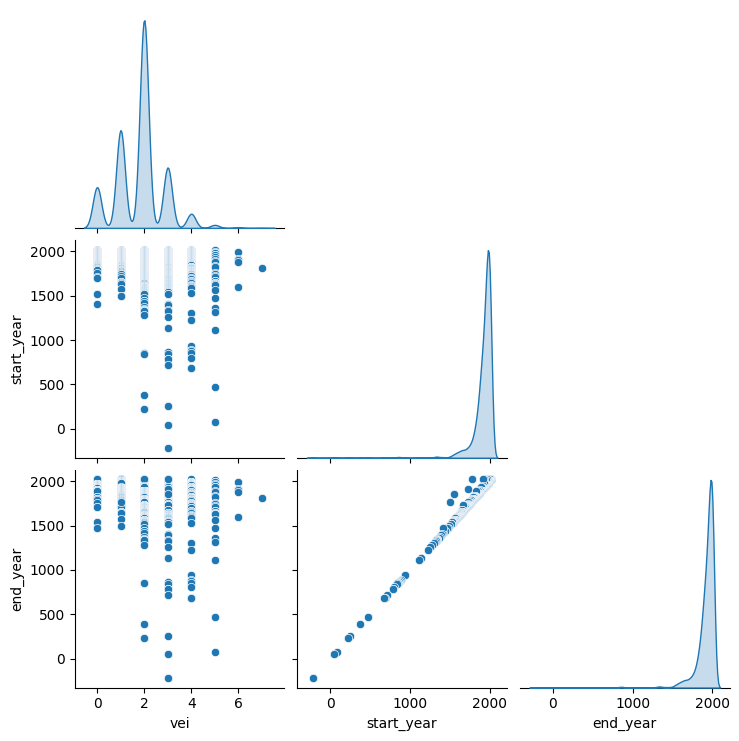

In [20]:
# Selecting numeric columns for pairplot
num_cols = ['vei', 'start_year', 'end_year']

# Drop rows with missing values in selected columns
eruptions_numeric = eruptions[num_cols].dropna()

# Create the pairplot
sns.pairplot(eruptions_numeric, diag_kind='kde', corner=True)

# Show the plot
plt.show()


It's a bit weird for this kind of data.  There appears to be some visual clustering regarding year and VEI, but nothing major.  Most observed volcanoes appear to be between 1500 and 2000, which makes sense.  The closer we get to modern the more observational data there will be.  It also appears that the most common VEI is 2, which is close to the mean we found above.

#Pearson Correlation Matrix

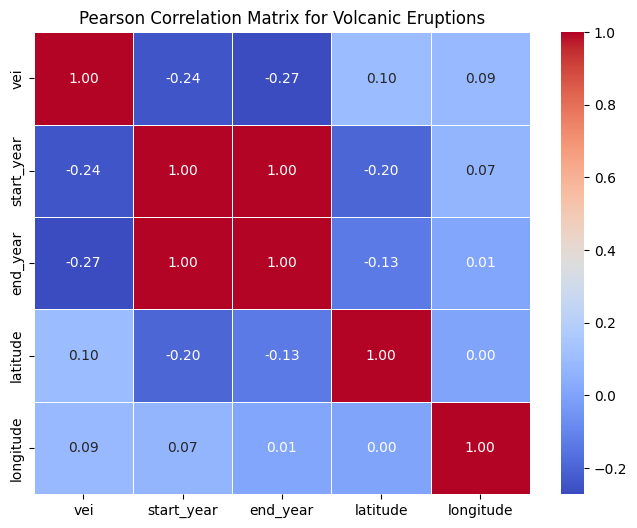

In [23]:
#Establish columns for correlation matrix
corr_col = ['vei', 'start_year', 'end_year', 'latitude', 'longitude']

# Compute the correlation matrix
corr_matrix = eruptions[corr_col].corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Pearson Correlation Matrix for Volcanic Eruptions")

# Show the plot
plt.show()


We are looking only at a few numeric variables here, none of which seem correlated, except for start year and end year.  So far it is not looking like there is any connection between VEI and location.


#VEI histogram


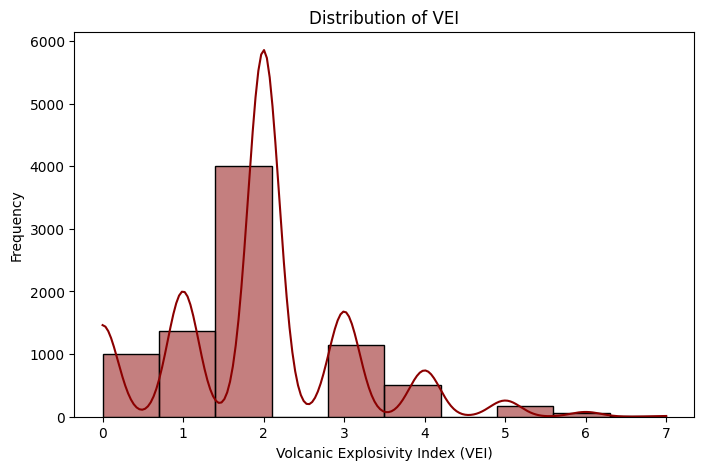

In [24]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create the histogram
sns.histplot(eruptions['vei'].dropna(), bins=10, kde=True, color='darkred')

# Labels and title
plt.xlabel("Volcanic Explosivity Index (VEI)")
plt.ylabel("Frequency")
plt.title("Distribution of VEI")

# Show the plot
plt.show()


We already cursorily examined this in the pair plot, but I wanted to take some more devout focus on VEI, which ranks the power of the eruption.  It seems like VEI index of 2 is much more common than any of the other magnitudes.

#Number of eruptions per year
Next, let's examine the number of eruptions per year.  We did this for the whole dataset in the pairplot, which gave us the following output:

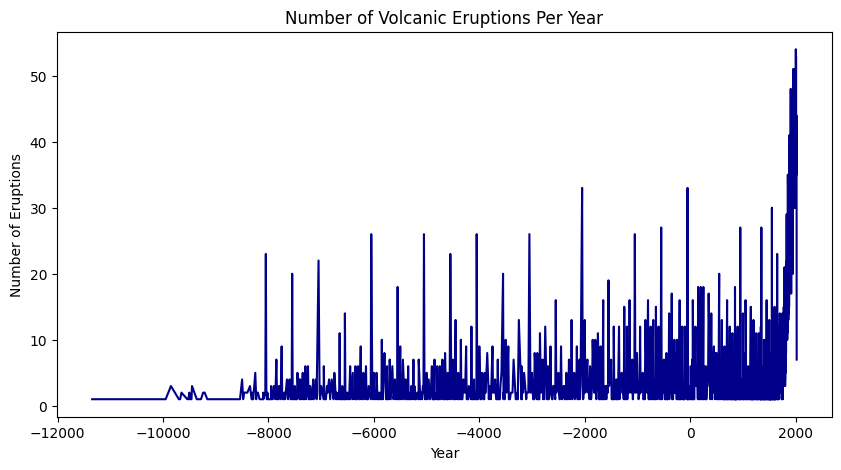

In [26]:
# Count eruptions per year
eruptions_per_year = eruptions['start_year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=eruptions_per_year.index, y=eruptions_per_year.values, color='darkblue')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Eruptions")
plt.title("Number of Volcanic Eruptions Per Year")

# Show the plot
plt.show()


Its a bit hard to see, so lets try to smooth this a bit with a rolling average:

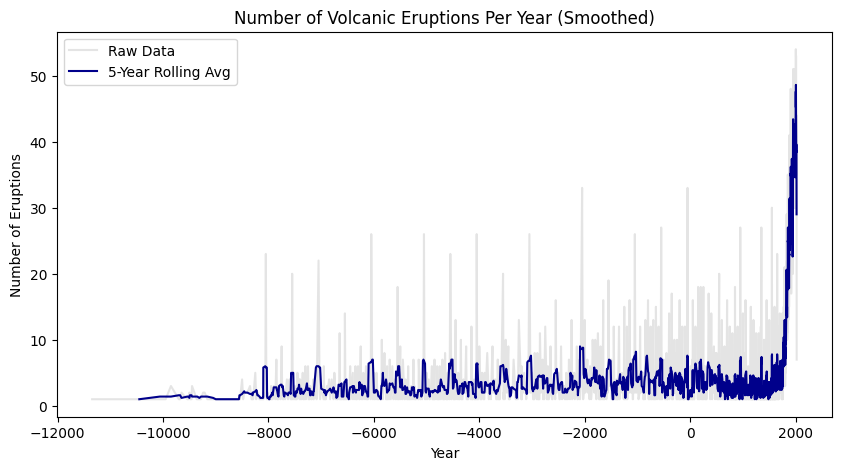

In [27]:
# Compute yearly eruption counts
eruptions_per_year = eruptions['start_year'].value_counts().sort_index()

# Apply a rolling average (window=5 for a 5-year smoothing)
rolling_eruptions = eruptions_per_year.rolling(window=5, center=True).mean()

# Plot the trend with smoothing
plt.figure(figsize=(10, 5))
sns.lineplot(x=eruptions_per_year.index, y=eruptions_per_year.values, label="Raw Data", color='lightgray', alpha=0.6)
sns.lineplot(x=rolling_eruptions.index, y=rolling_eruptions.values, label="5-Year Rolling Avg", color='darkblue')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Eruptions")
plt.title("Number of Volcanic Eruptions Per Year (Smoothed)")

# Show the plot
plt.show()


There are so many more eruptions in the historical record, especially as we approach yr 2000.  But lets zoom in a bit, and examine number of eruptions in hundred year increments between 1500 and 2025, which is when most of the eruptions have happened:

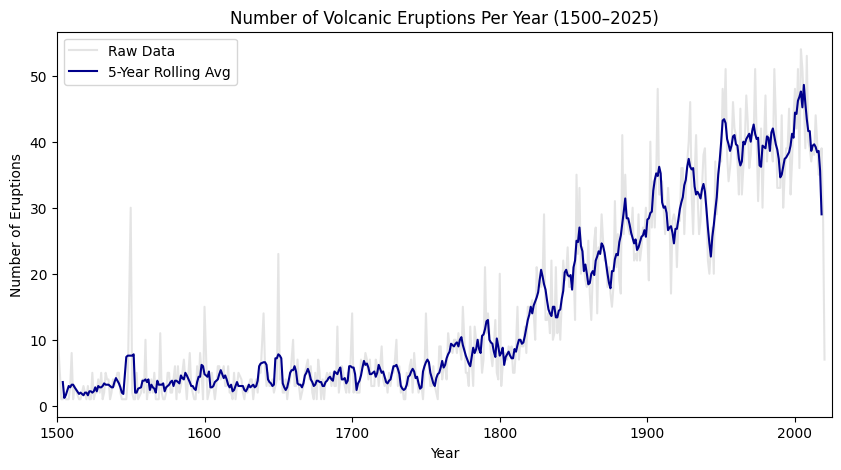

In [29]:
# Filter data for years between 1500 and 2025
filtered_eruptions = eruptions[(eruptions['start_year'] >= 1500) & (eruptions['start_year'] <= 2025)]

# Compute yearly eruption counts
eruptions_per_year = filtered_eruptions['start_year'].value_counts().sort_index()

# Apply a rolling average (5-year smoothing)
rolling_eruptions = eruptions_per_year.rolling(window=5, center=True).mean()

# Plot the trend with smoothing
plt.figure(figsize=(10, 5))
sns.lineplot(x=eruptions_per_year.index, y=eruptions_per_year.values, label="Raw Data", color='lightgray', alpha=0.6)
sns.lineplot(x=rolling_eruptions.index, y=rolling_eruptions.values, label="5-Year Rolling Avg", color='darkblue')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Eruptions")
plt.title("Number of Volcanic Eruptions Per Year (1500–2025)")

# Set x-axis limits
plt.xlim(1500, 2025)

# Show the plot
plt.show()


Again, we see an increase in the amount of eruptions occuring after 1800.  This is not reflecting an increase in eruption rates, but rather an increase in observation as the world became more globalized and people starting paying closer attention.  The amount of eruptions appear to level out around 1950, which suggests to me that the scientific community was now looking globally and are recording most volcanoes that happen, so lets examine that dataset closer next:

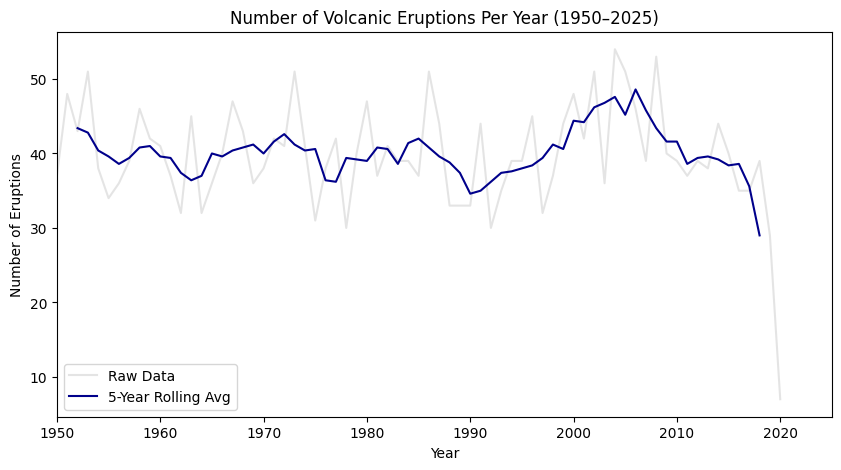

In [30]:
# Filter data for years between 1500 and 2025
filtered_eruptions = eruptions[(eruptions['start_year'] >= 1950) & (eruptions['start_year'] <= 2025)]

# Compute yearly eruption counts
eruptions_per_year = filtered_eruptions['start_year'].value_counts().sort_index()

# Apply a rolling average (5-year smoothing)
rolling_eruptions = eruptions_per_year.rolling(window=5, center=True).mean()

# Plot the trend with smoothing
plt.figure(figsize=(10, 5))
sns.lineplot(x=eruptions_per_year.index, y=eruptions_per_year.values, label="Raw Data", color='lightgray', alpha=0.6)
sns.lineplot(x=rolling_eruptions.index, y=rolling_eruptions.values, label="5-Year Rolling Avg", color='darkblue')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Eruptions")
plt.title("Number of Volcanic Eruptions Per Year (1950–2025)")

# Set x-axis limits
plt.xlim(1950, 2025)

# Show the plot
plt.show()


This type of questioning will be interesting for regressions and looking for cycles and trends through time.

#Geographic Distribution of Eruption by size
Next, I am curious if there is any kind of spatial relationship between these datasets.

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


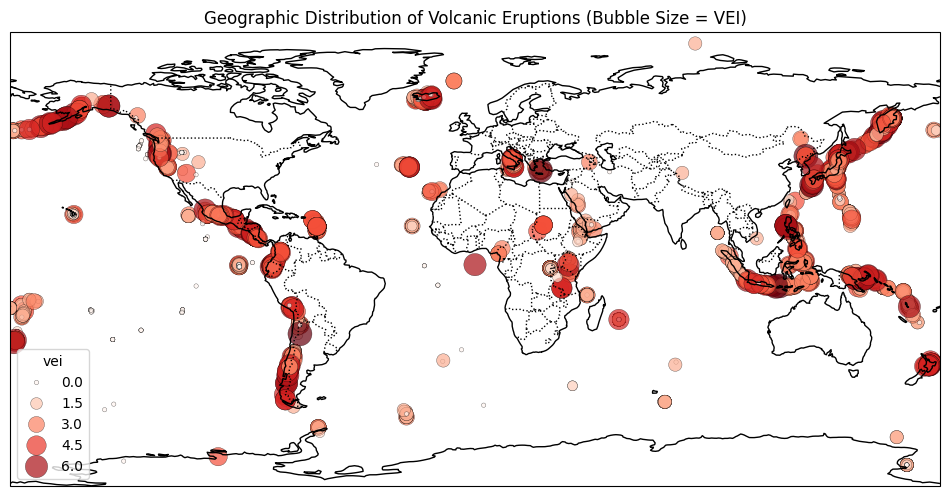

In [45]:

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set up the map
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot eruptions as bubbles (scatter plot)
sns.scatterplot(
    data=eruptions,
    x="longitude",
    y="latitude",
    size="vei",
    sizes=(10, 300),  # Adjusts bubble size range
    hue="vei",
    palette="Reds",
    alpha=0.7,
    edgecolor="black",
    ax=ax  # Plot on the Cartopy axis
)

# Add title and labels
plt.title("Geographic Distribution of Volcanic Eruptions (Bubble Size = VEI)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()




Okay we have now successfully generated a very common map.  we can see the entire Pacific Ring of Fire that wraps its way around the Pacific continental margin.  We can almost see the Mid-Atlantic Ridge, and interestingly only small volcanes are observed in the middle of the ocean.  We can also visualize the frequency of eruptions this way, and see where the most common eruptions occur.  It appears that Italy, Patagonia, South Asia, and just off the coast of Madagascar is most common.

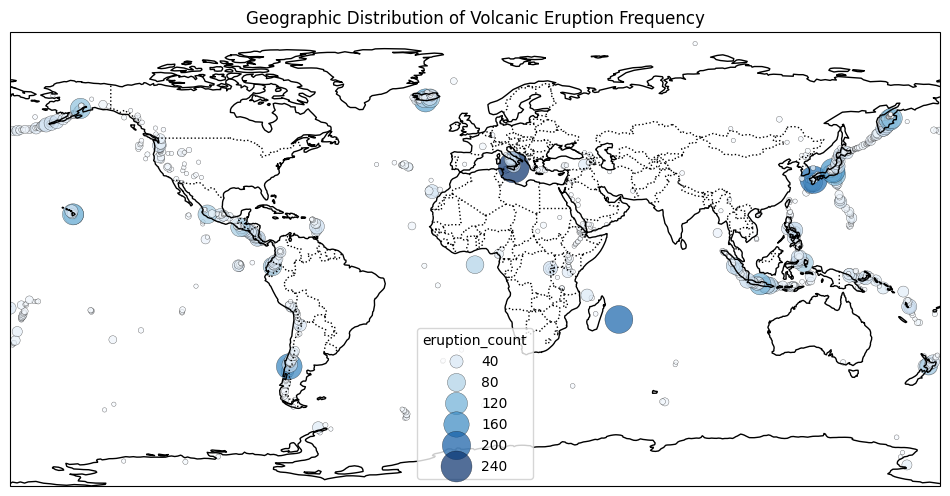

In [46]:
# Group eruptions by rounded latitude and longitude for heatmap-like regions
# Round to a specific level for grouping (e.g., 1 degree)
eruptions['lat_round'] = eruptions['latitude'].round(1)
eruptions['lon_round'] = eruptions['longitude'].round(1)

# Count the number of eruptions in each (lat, lon) group
eruption_counts = eruptions.groupby(['lat_round', 'lon_round']).size().reset_index(name='eruption_count')

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set up the map
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot eruptions as bubbles (scatter plot)
sns.scatterplot(
    data=eruption_counts,
    x="lon_round",
    y="lat_round",
    size="eruption_count",
    sizes=(10, 500),  # Adjust bubble size range
    hue="eruption_count",
    palette="Blues",  # Change palette for frequency
    alpha=0.7,
    edgecolor="black",
    ax=ax  # Plot on the Cartopy axis
)

# Add title and labels
plt.title("Geographic Distribution of Volcanic Eruption Frequency")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


# Most active volcanoes
Finally, lets examine the most active volcanoes:

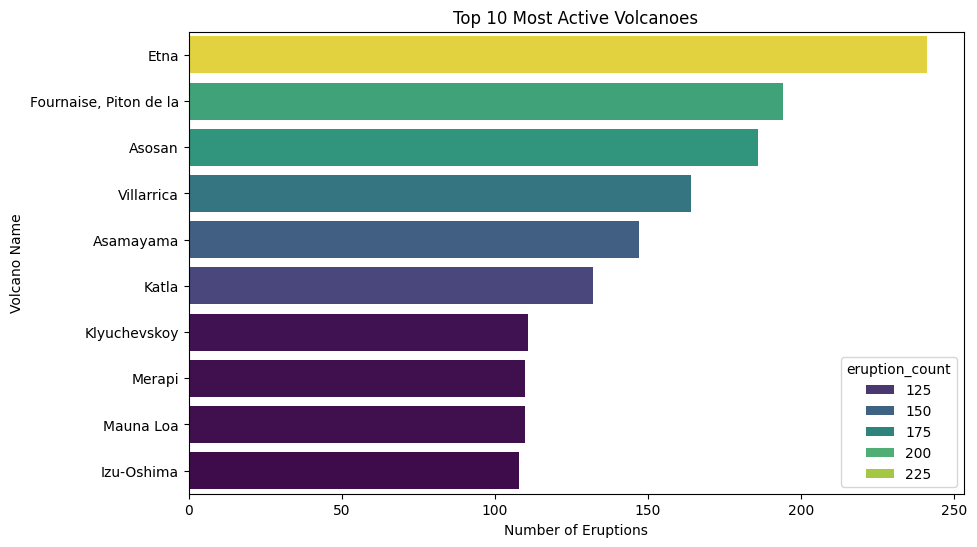

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by volcano and count the number of eruptions
volcano_activity = eruptions.groupby('volcano_name').size().reset_index(name='eruption_count')

# Sort volcanoes by eruption count in descending order
volcano_activity_sorted = volcano_activity.sort_values(by='eruption_count', ascending=False)

# Get the top 10 most active volcanoes
top_10_volcanoes = volcano_activity_sorted.head(10)

# Plot the top 10 most active volcanoes
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_volcanoes,
    x='eruption_count',
    y='volcano_name',
    palette='viridis',
    hue='eruption_count'
)

# Add titles and labels
plt.title("Top 10 Most Active Volcanoes")
plt.xlabel("Number of Eruptions")
plt.ylabel("Volcano Name")

# Show the plot
plt.show()


It looks like this list got us pretty close to the map of volcano frequency we made earlier.  In the rest of this module, I will be running a series of regressions on frequency, location, magnitude, and more on these eruptions.